# World's Top Military Power
## Author: Eren ERİŞ

Bu veri setinde ülkerlein askeri güclerine göre sınıflandırma yapılmıştır

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from yellowbrick.cluster import KElbowVisualizer
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage

import warnings
warnings.filterwarnings('ignore')

In [66]:
df = pd.read_excel("World military power.xlsx") #Dataset Read

In [67]:


# Sütunları güncelle
df.columns = df.iloc[0]

# İlk satırı veri çerçevesinden kaldır
df = df[1:].reset_index(drop=True)

In [68]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968


In [69]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',


In [70]:
df.shape

(138, 60)

In [71]:
df.isnull().sum()

0
Military Strength                           0
Military Strength Power Index               0
Aircraft Strength                           0
Aircraft Strength value                     0
Fighter/Interceptor Strength                0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength                    0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength           0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet                      0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength                   0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength            0
Attack Helicopter Fleet Strength value      0
Tank Strength                               0
Tank Strength value                         0
AFV/APC Strength                            0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength           0
Self-Propelled Artillery Strengt

In [72]:
#Boş sutunlar incelendiğinde bu ülkelerde o alanla ilgiliolmadığından yazılmıştır. Bunları 0 a çekebiliriz
df = df.fillna(0)

In [73]:
df.isnull().sum()

0
Military Strength                          0
Military Strength Power Index              0
Aircraft Strength                          0
Aircraft Strength value                    0
Fighter/Interceptor Strength               0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength                   0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength          0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet                     0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength                  0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength           0
Attack Helicopter Fleet Strength value     0
Tank Strength                              0
Tank Strength value                        0
AFV/APC Strength                           0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength          0
Self-Propelled Artillery Strength value    0
Towed Ar

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    int64  
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    int64  
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    int64  
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    int64  
 10  Trainer Aircraft Fleet                   138 non-n

In [47]:
# 'value' kelimesini içeren sütunları seç
value_columns = [col for col in df.columns if 'value' in col]

In [75]:

# Seçilen sütunlardaki değerleri stringe dönüştür
for col in value_columns:
    df[col] = df[col].astype(str)

# Virgülleri kaldıran ve sayıları int'e dönüştüren fonksiyon
def remove_commas_and_convert_to_int(number):
    return int(number.replace(',', '')) if number != 'nan' else 0

# Seçilen sütunlardaki değerleri düzelt
for col in value_columns:
    df[col] = df[col].str.replace(',', '').apply(remove_commas_and_convert_to_int)

In [76]:
x = df[['Military Strength','Military Strength Power Index']+value_columns]

In [77]:
x

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,...,43,0,5500,0,14325743,34940837,652230,0,1200,5987
1,Albania,2.3137,19,0,0,0,0,19,0,0,...,4,16000,42500,168300000,1519438,3057220,28748,362,41,691
2,Algeria,0.4659,551,103,22,59,87,257,45,880,...,157,1306000,325000,12200000000,20741263,41657488,2381741,998,0,6734
3,Angola,0.8379,295,72,18,30,47,126,15,379,...,176,1666000,82300,8273000000,6244205,30355880,1246700,1600,1300,5369
4,Argentina,0.6521,227,24,7,9,64,100,0,370,...,1138,479400,685000,2185000000,20179430,44694198,2780400,4989,11000,11968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.6449,260,38,0,52,82,86,10,390,...,444,2007000,575000,300900000000,14260129,31689176,912050,2800,7100,5267
134,Vietnam,0.3559,293,77,0,38,36,138,25,2615,...,45,271400,525000,4400000000,51043216,97040334,331210,3444,17702,4616
135,Yemen,1.2412,169,77,0,8,21,61,14,620,...,57,12260,145000,3000000000,11266221,28667230,527968,1906,0,1601
136,Zambia,1.6464,108,18,0,11,52,27,0,75,...,88,0,21000,0,6166905,16445079,752618,0,2250,6043


In [85]:
x=pd.get_dummies(x,drop_first=True)

In [86]:
wcss=[] #Dirsek Noktasını Hesaplama
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [87]:
wcss

[4.6836145769505446e+26,
 1.5917092822833965e+26,
 4.20869351015841e+25,
 1.5683101158001778e+25,
 7.95631259022111e+24,
 4.984308976659091e+24,
 2.6142676782293204e+24,
 1.516098509554204e+24,
 1.1726889378721184e+24]

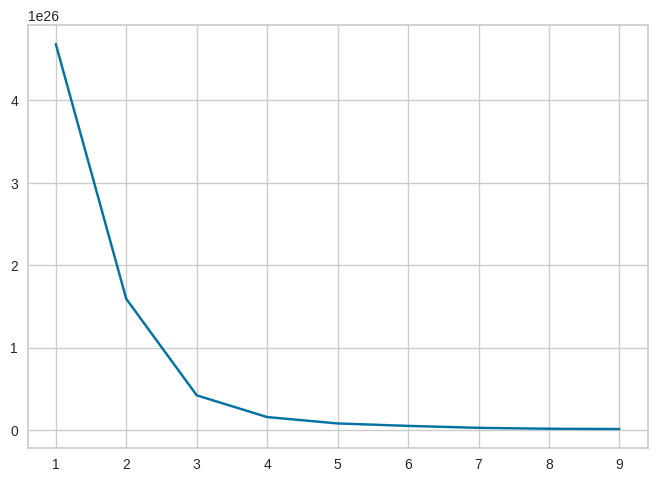

In [88]:
plt.plot(range(1,10),wcss)

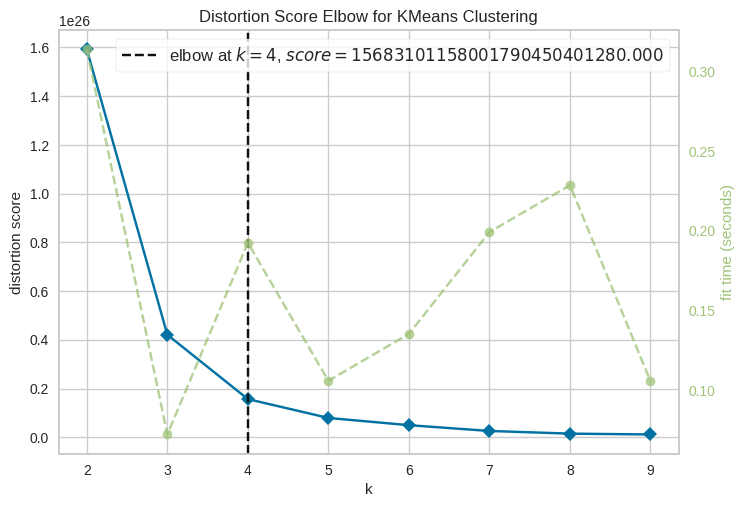

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [89]:
km = KMeans()
visualizer = KElbowVisualizer(km,k=(2,10))
visualizer.fit(x)
visualizer.show()

In [90]:
model = KMeans(4)

In [91]:
model=model.fit(x)

In [92]:
Tahmin = model.predict(x)

In [93]:
x["Cluster"]=Tahmin

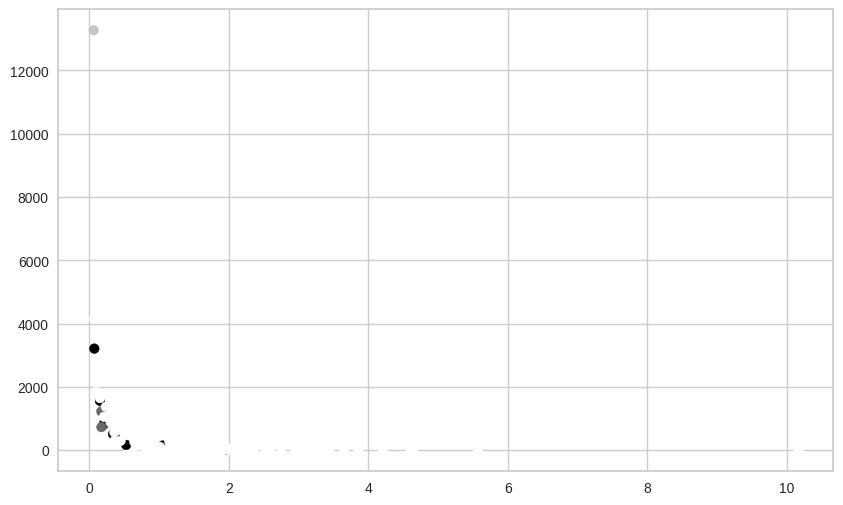

In [99]:
plt.figure(figsize=(10,6))
plt.scatter(x['Military Strength Power Index'],x['Aircraft Strength value'],c=Tahmin)

In [100]:
data=linkage(x,method='ward',metric='euclidean')

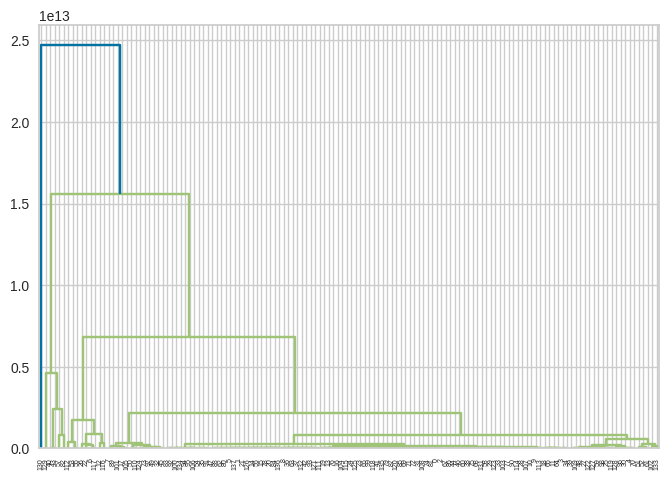

In [101]:
dendrogram(data);